PROJECT REPORT
MALL CUSTOMERS CLUSTERING USING PCA AND KMA
BY SQN LDR NISHAN TIWARI 204102316


1.	Introduction. Here we have taken a dataset of customers visiting a mall. The data set contains columns like Customer No, Gender, Age, Annual Income (k$) and Spending Score. This data is unclustered and hence our main objective is to cluster this data using known algorithms like Principal Component Analysis and K Means Clustering Algorithm. This clustering will help mall managers to predict demand and efficiently supply items and increase profit.
2.	Objective. Our objective is to cluster the dataset of mall customers using PCA and KMA technique.
3.	The data contains 200 customer’s data. 

Here we have first used PCA to find out that out of the 5 properties given, which 2 are the most important. For this we have fist taken 3 properties into account i.e. customer id, annual income and spending score. Further we have calculated the covariance matrix and finally we have found the eigen values of the covariance matrix. Then we have taken the highest 2 eigen values and their corresponding eigen vectors. This led us to find out that the most important properties of the dataset are customer’s annual income and spending score.

Finally the  2  features which are important for classification are
 ['Annual Income (k$)', 'Spending Score (1-100)']


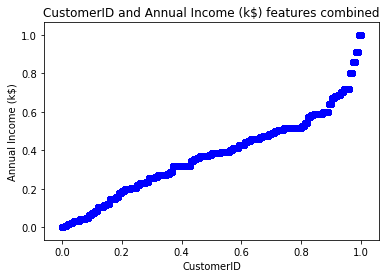

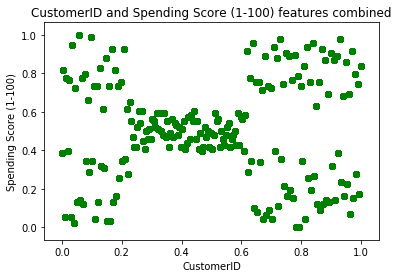

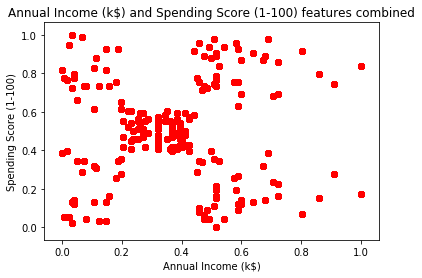

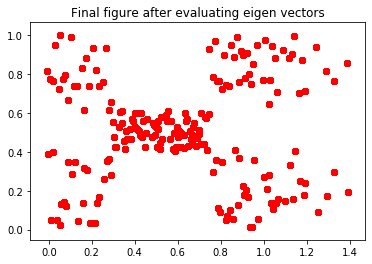

In [3]:
import csv
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
def covariance(sep_data,mean1):
    cov=[]
    for j in range(len(sep_data[0])):
        new_lst=[]
        for k in range(len(sep_data[0])):
            s=0
            for i in range(len(sep_data)):
                s+=(sep_data[i][j]-mean1[j])*(sep_data[i][k]-mean1[k])
            new_lst.append(s/(len(sep_data)-1))
        cov.append(new_lst)
    return (cov)
def normalize(data_sep):
    minimum=[]
    maximum=[]
    normal=[]
    for i in data_sep:
        maximum=[0,0,0]
        minimum=[100,100,100]
        for j in range(len(data_sep[0])):
            for k in range(len(data_sep)):
                numb=data_sep[k][j]
                if maximum[j]<=numb:
                    maximum[j]=numb
                if minimum[j]>numb:
                    minimum[j]=numb
        for j in range(len(data_sep)):
            newlist2=[]
            for k in range(len(data_sep[0])):
                newlist2.append((data_sep[j][k]-minimum[k])/(maximum[k]-minimum[k]))
            normal.append(newlist2)
    return(normal)
def nishan():
    data=[]
    raw_data=[]
    sep_data=[]
    feature=[]
    mean1=[]
    cov=[]
    eigen_val=[]
    eigen_vec=[]
    Y=[]
    keys=[]
    A1=[]
    A2=[]
    B1=[]
    B2=[]
    newkeys=[]
    newkeysfinal=[]
    with open('C:/Users/NISHAN TIWARI/Mall_Customers.csv', newline='') as f:
        reader = csv.reader(f)
        raw_data = list(reader)
    f.close()
    
    for i in range(len(raw_data)):
        new_lst=[]
        if i == 0:
            keys=raw_data[i]
            continue
        for j in range(len(raw_data[0])):
            if j==1:
                new_lst.append(raw_data[i][j])
            else:
                new_lst.append(int(raw_data[i][j]))
        data.append(new_lst)
    #print(data)
    for i in data:
        new_lst=[]
        for j in range(len(i)):
            if j==1 or j==2:
                continue
            else:
                new_lst.append(i[j])
        sep_data.append(new_lst)
    normalized=normalize(sep_data)
    for i in range(len(keys)):
        if i == 1 or i == 2:
            continue
        newkeys.append(keys[i])
        newkeysfinal.append(keys[i])
    for j in range(len(normalized[0])):
        new_lst=[]
        for i in range(len(normalized)):
            new_lst.append(normalized[i][j])
        feature.append(new_lst)
    for i in range(len(feature)):
        mean1.append(mean(feature[i]))
    cov=covariance(normalized,mean1)
    val=np.empty([len(cov[0]),1])
    vec=np.empty([len(cov[0]),len(cov[0])])
    cov_np=np.empty([len(cov[0]),len(cov[0])])
    for k in range(len(cov)):
        for m in range(len(cov[0])):
            cov_np[k,m]=cov[k][m]
        val,vec=np.linalg.eig(cov_np)
    for k in range(len(cov)):
        eigen_val.append(val[k])
        new_lst=[]
        for m in range(len(cov[0])):
            new_lst.append(vec[k,m])
        eigen_vec.append(new_lst)
    for i in range(len(eigen_val)):
        for j in range(len(eigen_val)-i-1):
            if eigen_val[j]<eigen_val[j+1]:
                eigen_val[j],eigen_val[j+1]=eigen_val[j+1],eigen_val[j]
                eigen_vec[j],eigen_vec[j+1]=eigen_vec[j+1],eigen_vec[j]
                newkeys[j],newkeys[j+1]=newkeys[j+1],newkeys[j]
    del eigen_val[-1]
    del newkeys[-1]
    del eigen_vec[-1]
    X=np.array(normalized)
    P=np.array(eigen_vec)
    P=np.matrix.transpose(P)
    Y_np=np.matmul(X,P)
    Y=Y_np.tolist()
    k=1
    m=0
    color=['b','g','r','c','m','y','k']
    for i in range(len(Y)):
        A1.append(Y[i][0])
        A2.append(Y[i][1])
    for i in range(len(sep_data[0])-1):
        for j in range(i+1,len(sep_data[0])):
            lb=newkeysfinal[i]+" and "+newkeysfinal[j]+" features combined"
            plot2=plt.figure(k)
            plt.scatter(feature[i],feature[j],c=color[m])
            plt.title(lb)
            plt.xlabel(newkeysfinal[i])
            plt.ylabel(newkeysfinal[j])
            k+=1
            m+=1
    plot2=plt.figure(k)
    plt.title("Final figure after evaluating eigen vectors")
    plt.scatter(A1, A2, c='r')
    print("Finally the ",len(newkeys)," features which are important for classification are\n",newkeys)
nishan()

4.	Then we have used KMA to do the clustering. We have plotted the data using KMA using k value as 2,3,4,5,6,7,8,9,10,11. Upon plotting, we visually found that k=5 was supposedly the optimum value for clustering. However, we used silhouette plot to check if our belief was true. Using silhouette plot we found optimum k value to be 5. Further we plotted and classified the data into 5 parts namingly 0,1,2,3,4 wherein
0 means low income low spending customers
1 means medium income medium spending customers
2 means high income high spending customers
3 means low income high spending customers
4 means high income low spending customers


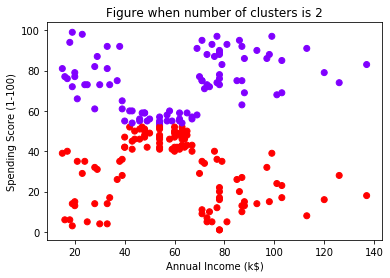

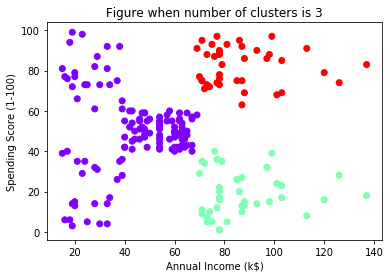

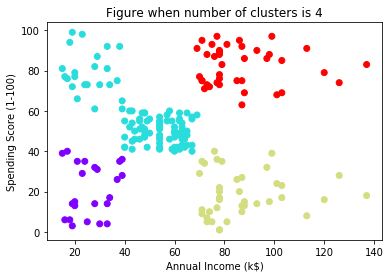

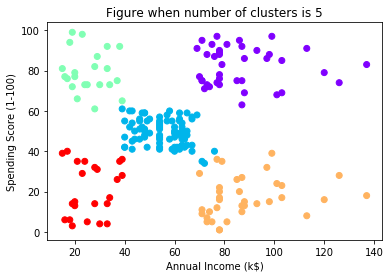

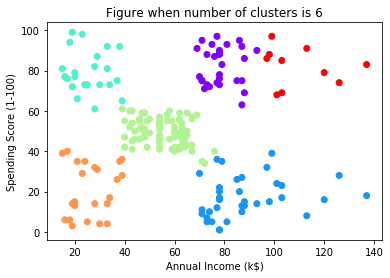

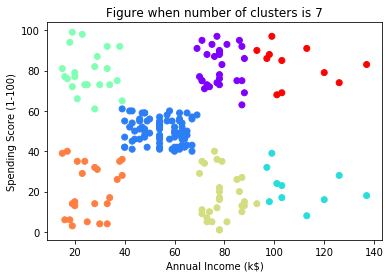

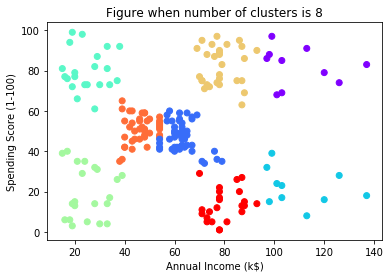

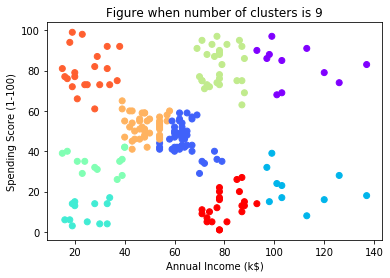

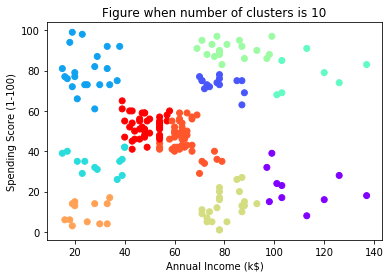

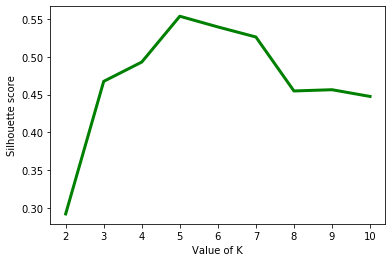

Best value of K found is
 5


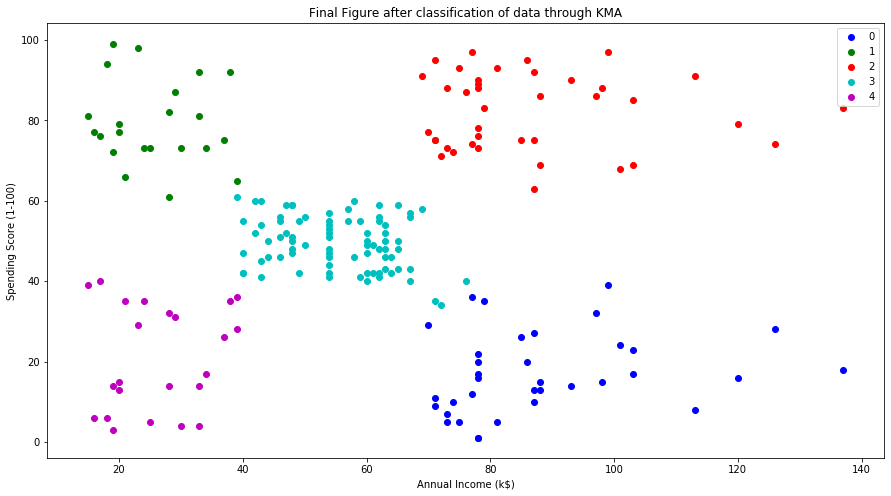

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def nishan():
    data=[]
    raw_Data=[]
    data_mean=[]
    feature={}
    keys=[]
    with open('C:/Users/NISHAN TIWARI/Mall_Customers.csv', newline='') as f:
        reader = csv.reader(f)
        raw_data = list(reader)
    f.close()
    for i in range(len(raw_data)):
        new_lst=[]
        if i == 0:
            keys=raw_data[i]
            continue
        for j in range(len(raw_data[0])):
            if j==1:
                new_lst.append(raw_data[i][j])
            else:
                new_lst.append(int(raw_data[i][j]))
        data.append(new_lst)
    for i in range(len(data[0])):
        feature[keys[i]]=[]
        if i==1:
            for j in range(len(data)):
                if data[j][i]=='Male':
                    feature[keys[i]].append(1)
                else:
                    feature[keys[i]].append(0)
            continue
        for j in range(len(data)):
            feature[keys[i]].append(data[j][i])
    k=1
    X=np.array(feature[keys[2]])
    Y=np.array(feature[keys[3]])
    Z=np.array(feature[keys[4]])
    fig = plt.figure(k)
    pnt=np.empty([len(X),2])
    for j in range(len(X)):
        pnt[j,0]=Y[j]
        pnt[j,1]=Z[j]
    sii=[]
    for j in range(2,11):
        kmeans=KMeans(n_clusters=j)
        kmeans.fit(pnt)
        plot2=plt.figure(k)
        plt.scatter(pnt[:,0],pnt[:,1], c=kmeans.labels_, cmap='rainbow')
        titl="Figure when number of clusters is "+str(j)
        plt.title(titl)
        plt.xlabel(keys[3])
        plt.ylabel(keys[4])
        labels=kmeans.labels_
        sii.append(silhouette_score(pnt,labels,metric='euclidean'))
        k+=1
    plot2=plt.figure(k)
    plt.plot(range(2, 11), sii, color ='g', linewidth ='3') 
    k+=1
    plt.xlabel("Value of K") 
    plt.ylabel("Silhouette score") 
    plt.show()
    kmax=0.0
    best_k=0
    for i in range(2,11):
        if kmax<=sii[i-2]:
            kmax=sii[i-2]
            best_k=i
    print("Best value of K found is\n",best_k)
    kmeans=KMeans(n_clusters=best_k)
    kmeans.fit(pnt)
    labels=kmeans.labels_
    classified_data={}
    for i in range(best_k):
        classified_data[i]=[]
        for j in range(len(data)):
            if labels[j]==i:
                classified_data[i].append(data[j])
    color=['b','g','r','c','m','y','k']
    m=0
    X={}
    Y={}
    for key in classified_data:
        X[key]=[]
        Y[key]=[]
        for i in classified_data[key]:
            X[key].append(i[3])
            Y[key].append(i[4])
    plot4 = plt.figure(k,figsize=(15,8))
    for key in X:
        plt.scatter(X[key],Y[key],c=color[m],label=key)
        m+=1
    plt.title("Final Figure after classification of data through KMA")
    plt.legend()
    plt.xlabel(keys[3])
    plt.ylabel(keys[4])
nishan()

5.	Conclusion. Here we finally were able to segment an unsegmented data by using a fully automatic program which on itself identifies first which parameters are most important using PCA and secondly clusters the data based on best k value using KMA